In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Load the data
train = pd.read_csv('TrainUpdated.csv')
test = pd.read_csv('TestUpdated2.csv')

# Check the shape of the data
print('Train shape:', train.shape)
print('Test shape:', test.shape)


Train shape: (191657, 36)
Test shape: (17710, 35)


In [21]:
print(train.isnull().sum())

record_ID                          0
worker_ID                     102391
worker_fname                  102391
worker_lname                  102391
worker_age                    102391
worker_sex                    102391
worker_shift                  102391
worker_team                   102391
worker_role                   102391
worker_coll_IDs               102572
worker_colls_same_sex_prtn    102572
worker_health                 102391
worker_commitment             102391
worker_perceptiveness         102391
worker_dexterity              102391
worker_sociality              102391
worker_goodness               102391
worker_strength               102391
worker_openmindedness         102391
worker_workstyle              102391
chief_ID                      102572
chief_fname                   102572
chief_lname                   102572
chief_age                     102572
chief_sub_age_diff            102572
chief_sex                     102572
chief_role                    102572
c

In [22]:
# each row that doesn't have a worker_ID is removed because all the other columns are also missing
train = train.dropna(subset=['worker_ID'])

In [23]:
print(train.isnull().sum())

record_ID                       0
worker_ID                       0
worker_fname                    0
worker_lname                    0
worker_age                      0
worker_sex                      0
worker_shift                    0
worker_team                     0
worker_role                     0
worker_coll_IDs               181
worker_colls_same_sex_prtn    181
worker_health                   0
worker_commitment               0
worker_perceptiveness           0
worker_dexterity                0
worker_sociality                0
worker_goodness                 0
worker_strength                 0
worker_openmindedness           0
worker_workstyle                0
chief_ID                      181
chief_fname                   181
chief_lname                   181
chief_age                     181
chief_sub_age_diff            181
chief_sex                     181
chief_role                    181
chief_commitment              181
chief_perceptiveness          181
chief_goodness

In [24]:
train = train.dropna(subset=['chief_ID'])

In [25]:
print(train.isnull().sum())

record_ID                     0
worker_ID                     0
worker_fname                  0
worker_lname                  0
worker_age                    0
worker_sex                    0
worker_shift                  0
worker_team                   0
worker_role                   0
worker_coll_IDs               0
worker_colls_same_sex_prtn    0
worker_health                 0
worker_commitment             0
worker_perceptiveness         0
worker_dexterity              0
worker_sociality              0
worker_goodness               0
worker_strength               0
worker_openmindedness         0
worker_workstyle              0
chief_ID                      0
chief_fname                   0
chief_lname                   0
chief_age                     0
chief_sub_age_diff            0
chief_sex                     0
chief_role                    0
chief_commitment              0
chief_perceptiveness          0
chief_goodness                0
record_date                   0
record_w

In [26]:
print(train.isna().sum())

record_ID                     0
worker_ID                     0
worker_fname                  0
worker_lname                  0
worker_age                    0
worker_sex                    0
worker_shift                  0
worker_team                   0
worker_role                   0
worker_coll_IDs               0
worker_colls_same_sex_prtn    0
worker_health                 0
worker_commitment             0
worker_perceptiveness         0
worker_dexterity              0
worker_sociality              0
worker_goodness               0
worker_strength               0
worker_openmindedness         0
worker_workstyle              0
chief_ID                      0
chief_fname                   0
chief_lname                   0
chief_age                     0
chief_sub_age_diff            0
chief_sex                     0
chief_role                    0
chief_commitment              0
chief_perceptiveness          0
chief_goodness                0
record_date                   0
record_w

In [27]:
train.head()

,record_ID,worker_ID,worker_fname,worker_lname,worker_age,worker_sex,worker_shift,worker_team,worker_role,worker_coll_IDs,...,chief_role,chief_commitment,chief_perceptiveness,chief_goodness,record_date,record_week_in_series,record_day_in_series,?,???,efficiency
0,70885,98000091.0,Claudia,Davis,30.0,F,Shift 1,Team 4,Laborer,"[98000087, 98000089, 98000090, 98000092, 98000...",...,Team Leader,0.819,0.659,0.755,4/6/2021,14.0,96.0,1.0,Tuesday,0.84
1,160431,98000621.0,Eva,Chao,39.0,F,Shift 2,Team 12,Laborer,"[98000246, 98000247, 98000249, 98000250, 98000...",...,Team Leader,0.945,0.514,0.966,8/2/2021,31.0,214.0,0.0,Monday,0.52
2,161100,98000377.0,Michael,Pierce,46.0,M,Shift 3,Team 18,Laborer,"[98000368, 98000370, 98000371, 98000373, 98000...",...,Team Leader,0.581,0.771,0.683,8/3/2021,31.0,215.0,1.0,Tuesday,1.97
3,21762,98000411.0,Margaret,Olson,51.0,F,Shift 3,Team 20,Laborer,"[98000408, 98000409, 98000410, 98000412, 98000...",...,Team Leader,0.702,0.924,0.577,1/29/2021,5.0,29.0,4.0,Friday,0.78
6,23531,98000207.0,Nathan,Tran,60.0,M,Shift 2,Team 10,Laborer,"[98000205, 98000206, 98000208, 98000209, 98000...",...,Team Leader,0.683,0.384,0.436,2/2/2021,5.0,33.0,1.0,Tuesday,0.59


In [28]:
print(train['?'].unique())
print(train['???'].unique())

[1. 0. 4. 3. 2. 5.]
['Tuesday' 'Monday' 'Friday' 'Thursday' 'Wednesday' 'Saturday']


? and ??? Are the same.

In [29]:
train = train.drop(['???'], axis=1)
test = test.drop(['???'], axis=1)

C:\Users\ferja\AppData\Local\Temp\ipykernel_17120\1644386758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()


<Axes: >

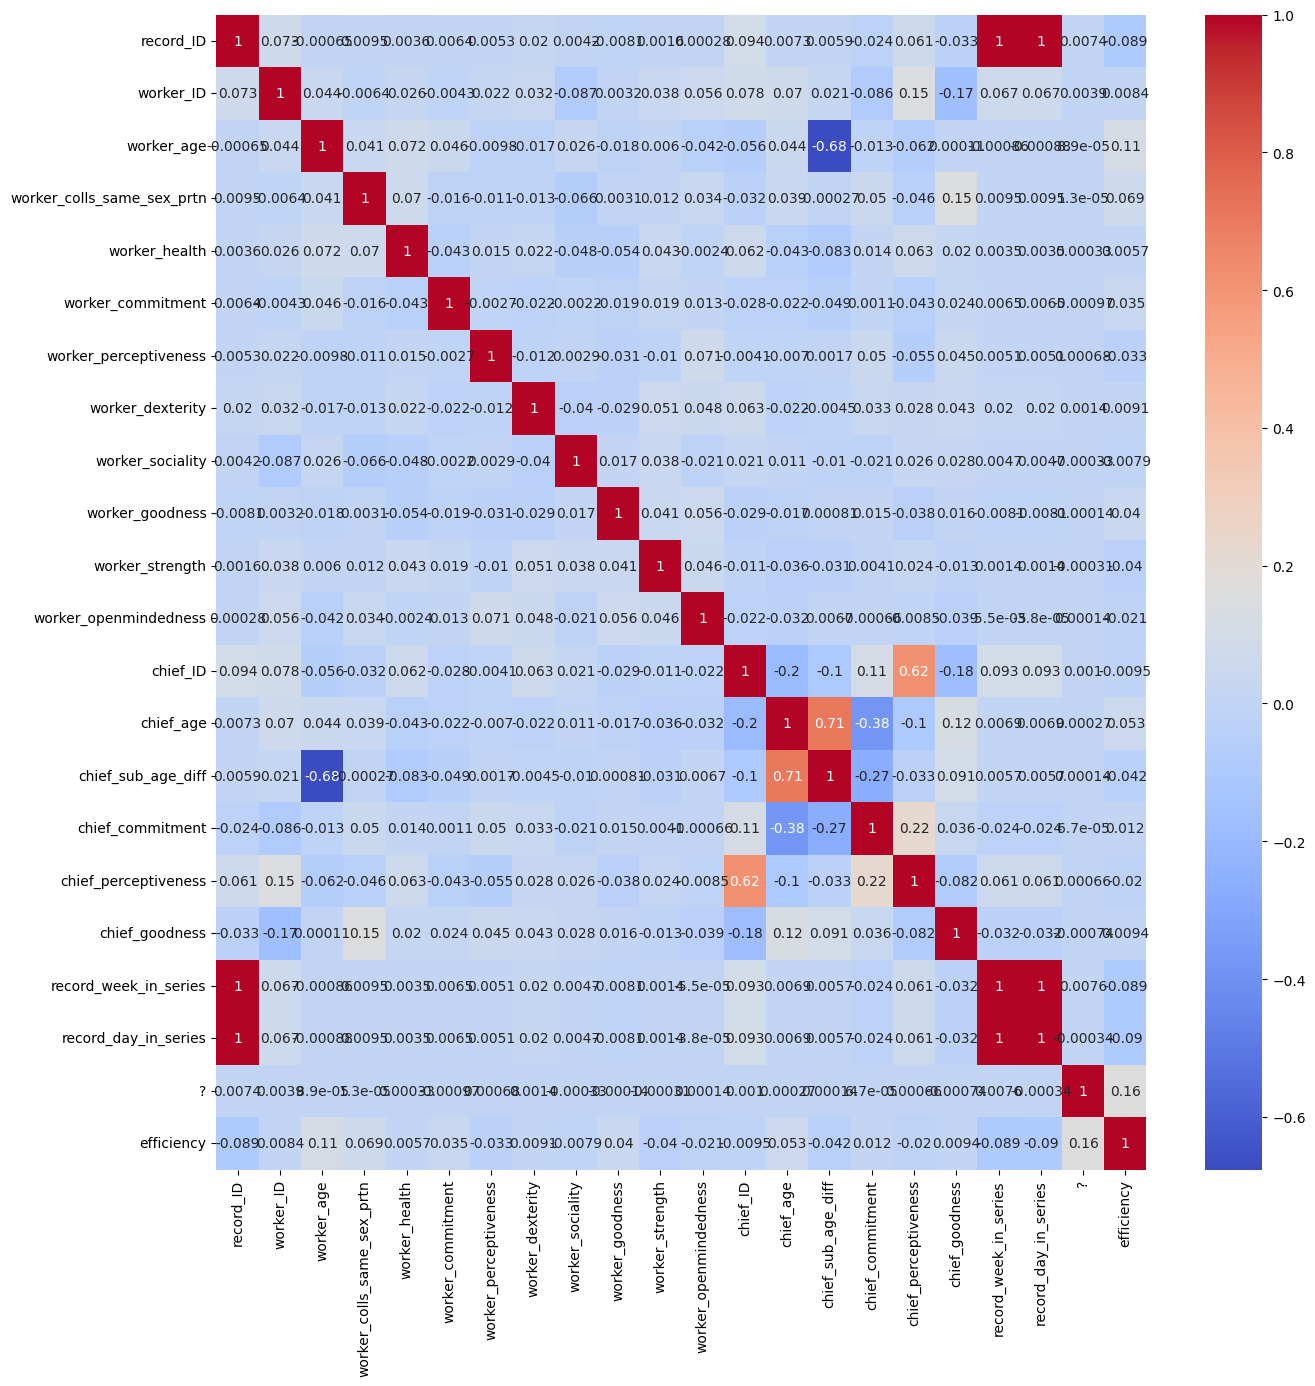

In [30]:
correlation = train.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [31]:
test_record_id = test['record_ID']

In [32]:
train = train.drop(['record_ID','worker_fname', 'worker_lname',  'record_week_in_series', 'record_day_in_series', 'chief_ID', 'chief_age', 'chief_fname', 'chief_lname', 'chief_sub_age_diff'], axis=1)
test = test.drop(['record_ID','worker_fname', 'worker_lname',  'record_week_in_series', 'record_day_in_series', 'chief_ID', 'chief_age', 'chief_fname', 'chief_lname', 'chief_sub_age_diff'], axis=1)

In [33]:
train['worker_chief_sex_same'] = train['worker_sex'] == train['chief_sex']
test['worker_chief_sex_same'] = test['worker_sex'] == test['chief_sex']


 

C:\Users\ferja\AppData\Local\Temp\ipykernel_17120\1644386758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()


<Axes: >

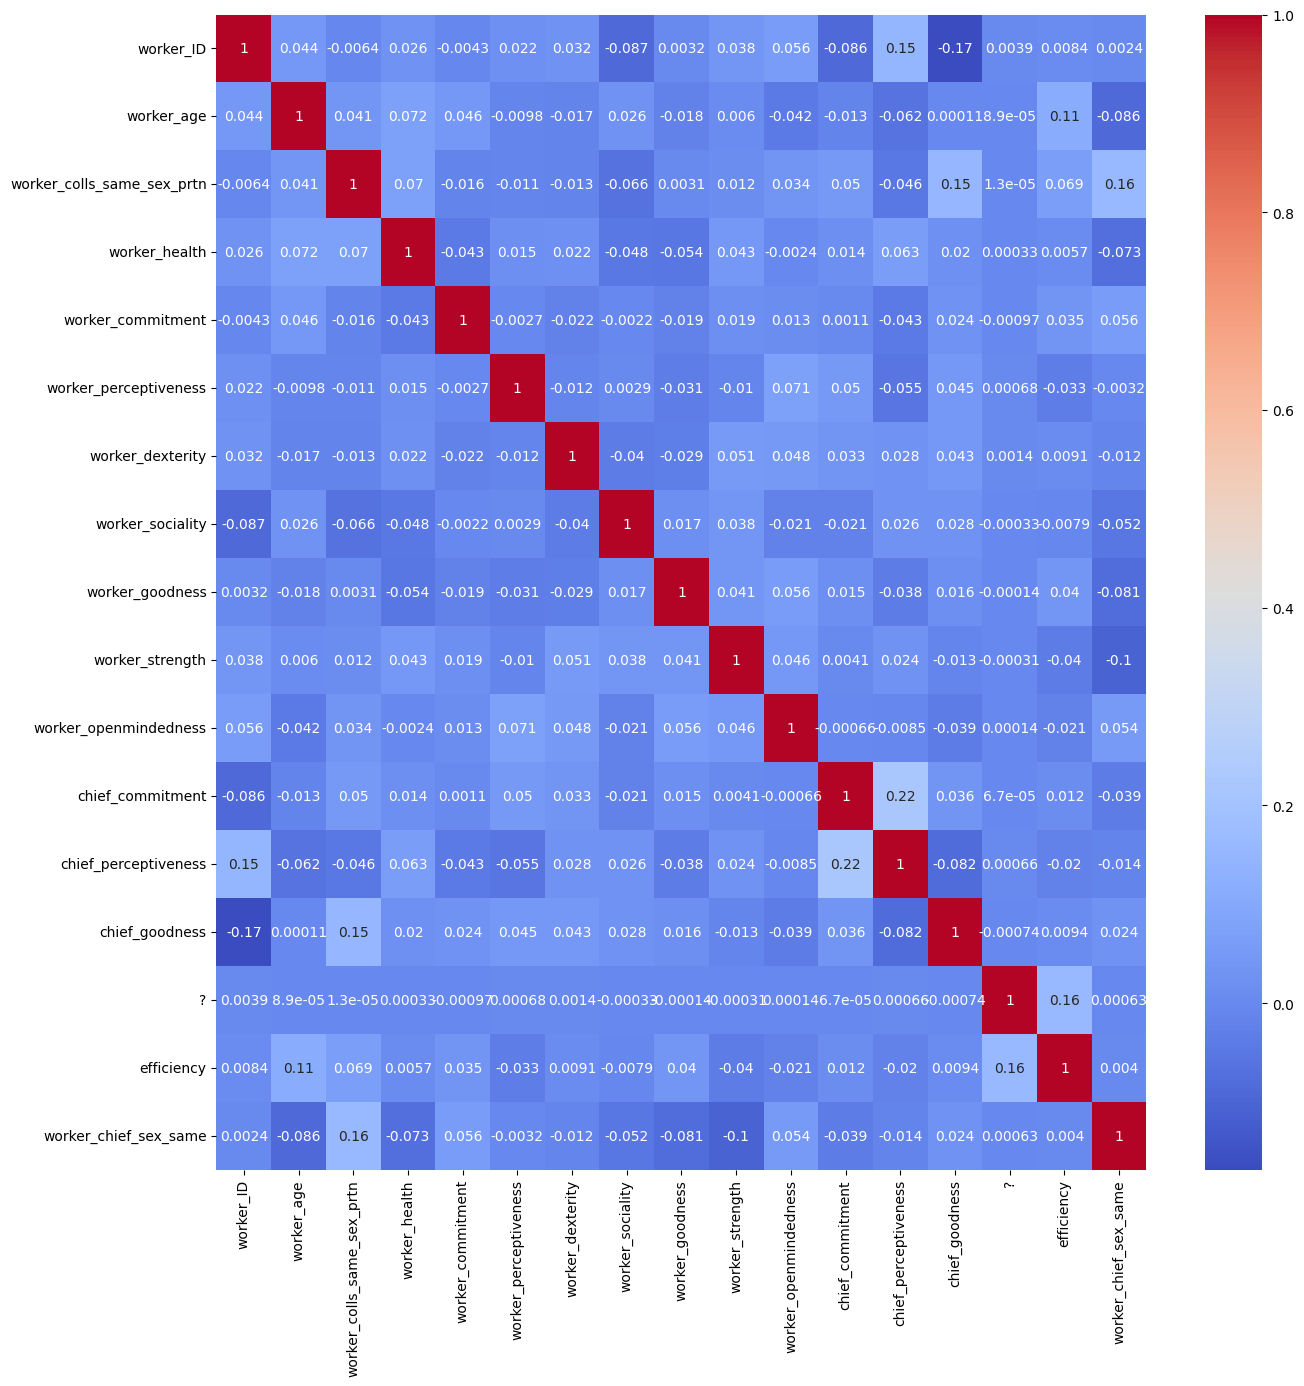

In [34]:
correlation = train.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

C:\Users\ferja\AppData\Local\Temp\ipykernel_17120\665711447.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['efficiency'])


<Axes: xlabel='efficiency', ylabel='Density'>

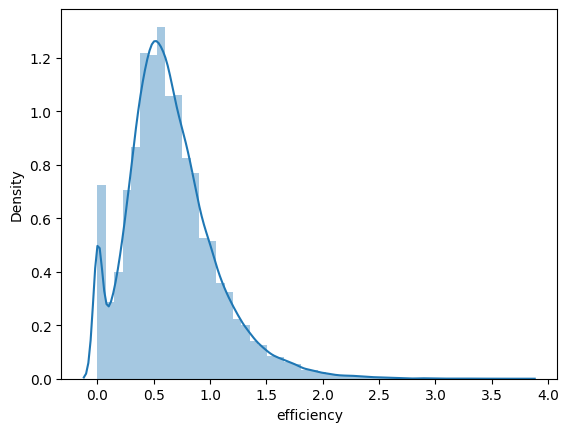

In [35]:
sns.distplot(train['efficiency'])

In [36]:
print(train.dtypes)

worker_ID                     float64
worker_age                    float64
worker_sex                     object
worker_shift                   object
worker_team                    object
worker_role                    object
worker_coll_IDs                object
worker_colls_same_sex_prtn    float64
worker_health                 float64
worker_commitment             float64
worker_perceptiveness         float64
worker_dexterity              float64
worker_sociality              float64
worker_goodness               float64
worker_strength               float64
worker_openmindedness         float64
worker_workstyle               object
chief_sex                      object
chief_role                     object
chief_commitment              float64
chief_perceptiveness          float64
chief_goodness                float64
record_date                    object
?                             float64
efficiency                    float64
worker_chief_sex_same            bool
dtype: objec

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into features and target variable
X = train.drop(['efficiency'], axis=1)
y = train['efficiency']

# Label encode the categorical variables
label_encoder = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column].astype(str))
        test[column] = label_encoder.transform(test[column].astype(str))   


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Initialize the model
model = RandomForestRegressor(n_estimators=102, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.1377574487235849
Mean Absolute Error: 0.26977933060185966


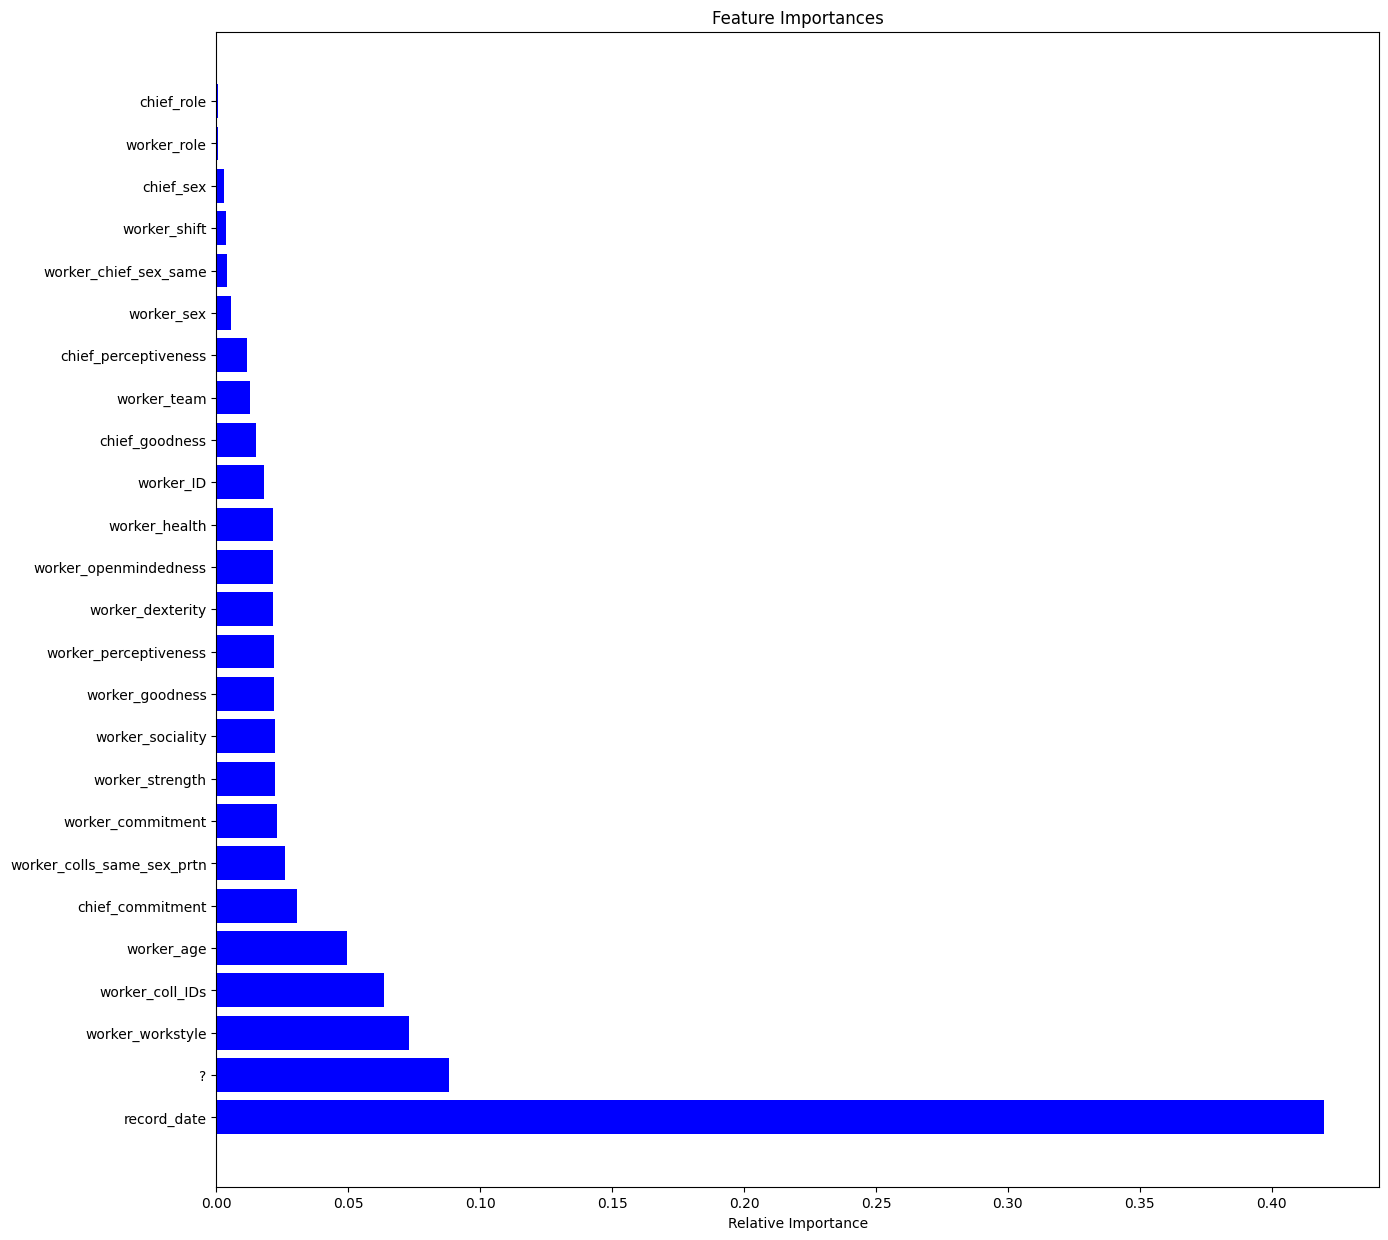

In [39]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(15, 15))
plt.title('Feature Importances')
plt.barh(range(X.shape[1]), importances[indices], color='b', align='center')
plt.yticks(range(X.shape[1]), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
out = model.predict(test)
submission = pd.DataFrame({'record_ID': test_record_id, 'efficiency': out})
submission.to_csv('Sample Submission.csv', index=False)